In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML
from scipy.spatial import distance_matrix
from md import Atom, molecular_dynamics, optimize_geometry
from mdplot import plot_md_frame, animate_md_traj

np.random.seed(7)

# One atom "MD" simulation 

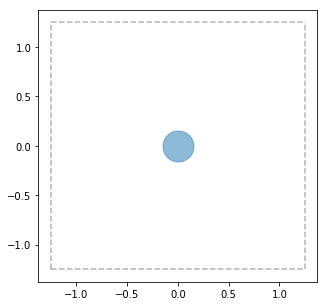

In [2]:
# first atom
pos = [0, 0, 0]  # position (nm)
velocity = [2, 1.5, 0]  #
argon_atom = Atom('Ar0', 'Ar', pos, velocity)

atoms = [argon_atom]

# box
box_len = 2.5  # nm
box = (
    [-box_len / 2, box_len / 2],  # x_min, x_max
    [-box_len / 2, box_len / 2],  # y_min, y_max
    [0, 0]  # operating on the x-y plane
)

# run md
positions, velocities = molecular_dynamics(
    atoms, box, dt=0.002, t_max=2.0,
)

# check out initial configuration and generate movie
movie = animate_md_traj(positions, atoms, box, speed=5)

In [3]:
HTML(movie.to_html5_video())

# system of atoms "MD" simulation (no forces)

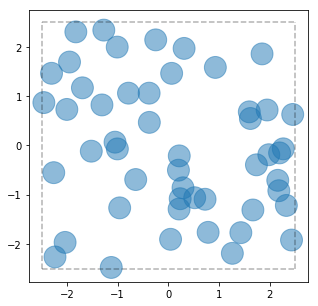

In [6]:
# first larger system
n_atoms = 50
velocity_scalar = 0.3
distance_cutoff = 0.4

# create box
box_len = 5.0  # nm
box = (
    [-box_len / 2, box_len / 2],  # x_min, x_max
    [-box_len / 2, box_len / 2],  # y_min, y_max
    [0, 0]  # operating on the x-y plane
)

# add atoms with random positions and velocities
atoms = []
for atom_id in range(n_atoms):
    pos = np.array([
        np.random.uniform(low=box[0][0], high=box[0][1]),
        np.random.uniform(low=box[1][0], high=box[1][1]),
        0
    ])
    vel = np.array([
        np.random.uniform(low=-1, high=1),
        np.random.uniform(low=-1, high=1),
        0
    ]) * velocity_scalar
    atoms.append(Atom(f'atom{atom_id}', 'Ar', pos, vel))

# run md
positions, velocities = molecular_dynamics(atoms, box, t_max=10.0)
# checkout initial position and make movie
movie = animate_md_traj(positions[::10, :, :], atoms, box, speed=5)

In [7]:
HTML(movie.to_html5_video())

# simulation of argon atoms, with LJ

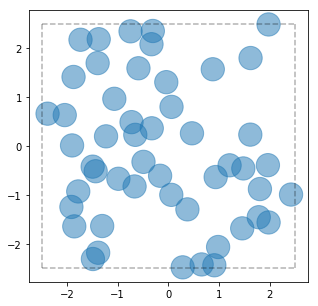

In [14]:
# provide force field parameters for two atom types
the_force = {
    'Ar': {
        'mass': 39.94,  # amu
        'charge': 0.0,  # e
        'sigma': 0.34,  # nm
        'epsilon': 0.99,  # kJ/mol
    },
}

# first larger system
n_atoms = 50
velocity_scalar = 0.3

# create box
box_len = 5.0  # nm
box = (
    [-box_len / 2, box_len / 2],  # x_min, x_max
    [-box_len / 2, box_len / 2],  # y_min, y_max
    [0, 0]  # operating on the x-y plane
)

# add atoms with random positions and velocities
atoms = []
for atom_id in range(n_atoms):
    pos = np.array([
        np.random.uniform(low=box[0][0], high=box[0][1]),
        np.random.uniform(low=box[1][0], high=box[1][1]),
        0
    ])
    vel = np.array([
        np.random.uniform(low=-1, high=1),
        np.random.uniform(low=-1, high=1),
        0
    ]) * velocity_scalar
    atoms.append(Atom(f'atom{atom_id}', 'Ar', pos, vel, the_force))

# run md
positions, velocities = molecular_dynamics(atoms, box, t_max=1.0)
# checkout initial position and make movie
movie = animate_md_traj(positions, atoms, box, speed=10)

### overlapping atoms cause "exploding" system!

In [15]:
HTML(movie.to_html5_video())

### optimizing the starting geometry allows physical simulation

In [10]:
# first larger system
n_atoms = 50
velocity_scalar = 0.3

# create box
box_len = 5.0  # nm

box = (
    [-box_len / 2, box_len / 2],  # x_min, x_max
    [-box_len / 2, box_len / 2],  # y_min, y_max
    [0, 0]  # operating on the x-y plane
)

# add atoms with random positions and velocities
atoms = []
for atom_id in range(n_atoms):
    pos = np.array([
        np.random.uniform(low=box[0][0], high=box[0][1]),
        np.random.uniform(low=box[1][0], high=box[1][1]),
        0
    ])
    vel = np.array([
        np.random.uniform(low=-1, high=1),
        np.random.uniform(low=-1, high=1),
        0
    ]) * velocity_scalar
    atoms.append(Atom(f'atom{atom_id}', 'Ar', pos, vel, the_force))

In [11]:
distance_cutoff = 0.4  # slightly larger than Argon sigma
# rearrange overlapping atoms
optimize_geometry(atoms, box, distance_cutoff)

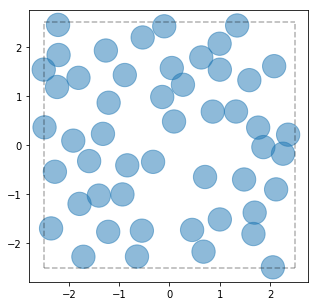

In [12]:
# run md
positions, velocities = molecular_dynamics(atoms, box, t_max=10.0)
# checkout initial position and make movie
movie = animate_md_traj(positions[::10, :, :], atoms, box, speed=5)

In [13]:
HTML(movie.to_html5_video())

# Homework Assignment:
---

Update the `f_coulomb` function in `md.py` to calculate atomic forces due to electrostatic interactions. With your updated force calculations, simulate a heterogeneous system with `Ar`, `Na`, and `Cl` atoms, and animate the trajectory. 

    (psssssttttt... updating the visualization functions in 
    `mdplot.py` so that atoms are colored by charge should 
    help you distinguish between different atom types)

In [2]:
# provide force field parameters for two atom types
the_force = {
    'Ar': {
        'mass': 39.95,  # amu
        'charge': 0.0,  # e
        'sigma': 3.4e-01,  # nm
        'epsilon': 9.94e-01,  # kJ/mol
    },
    'Na': {
        'mass': 22.99,
        'charge': 1.00,
        'sigma': 3.32840e-01,
        'epsilon': 1.15897e-02,
    },
    'Cl': {
        'mass': 35.45,  
        'charge': -1.00,  
        'sigma': 4.40104e-01,  
        'epsilon': 4.18400e-01,  
    },
}

In [11]:
# first larger system
n_atoms = 15
n_Ar_atoms = 5
n_Na_atoms = 5
n_Cl_atoms = 5

velocity_scalar = 0.3

# create box
box_len = 5.0  # nm

box = (
    [-box_len / 2, box_len / 2],  # x_min, x_max
    [-box_len / 2, box_len / 2],  # y_min, y_max
    [0, 0]  # operating on the x-y plane
)

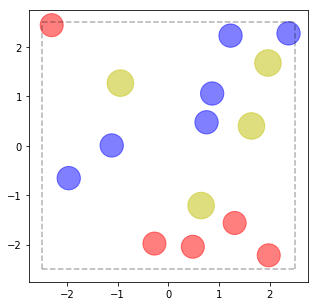

In [12]:
# add atoms with random positions and velocities
atoms = []
element = ['Ar','Na','Cl']
for atom_id in range(n_atoms):
    pos = np.array([
        np.random.uniform(low=box[0][0], high=box[0][1]),
        np.random.uniform(low=box[1][0], high=box[1][1]),
        0
    ])
    vel = np.array([
        np.random.uniform(low=-1, high=1),
        np.random.uniform(low=-1, high=1),
        0
    ]) * velocity_scalar
    if atom_id <= n_Ar_atoms:
        atoms.append(Atom(f'atom{atom_id}', element[0], pos, vel, the_force))
    elif atom_id <= (n_Ar_atoms+n_Na_atoms):
        atoms.append(Atom(f'atom{atom_id}', element[1], pos, vel, the_force))
    else:
        atoms.append(Atom(f'atom{atom_id}', element[2], pos, vel, the_force))
        
distance_cutoff = 0.4  # slightly larger than Argon sigma
# rearrange overlapping atoms
optimize_geometry(atoms, box, distance_cutoff)
# run md
positions, velocities = molecular_dynamics(atoms, box, t_max=10.0)
# checkout initial position and make movie
movie = animate_md_traj(positions[::10, :, :], atoms, box, speed=5)

In [10]:
HTML(movie.to_html5_video())

### Challenges:
    1. Extend to 3 dimensions
    2. Implement periodic boundary conditions
    3. Create molecules by adding bonded forces

du/dr part (in md.py)